### 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, 
                             recall_score, classification_report, roc_curve, 
                             roc_auc_score, precision_recall_curve)
import xgboost as xgb
import pickle
import warnings
from math import pi

warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


### 2. Load and Explore Data

In [2]:
# Load the dataset
df = pd.read_csv(r"WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isna().sum())

print("\nBasic Statistics:")
display(df.describe())

Dataset Shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 3. Target Variable Analysis and Encoding

In [3]:
# Check target distribution
print("Churn Distribution (Before Encoding):")
print(df.Churn.value_counts())
print("\nPercentage:")
print(df.Churn.value_counts(normalize=True) * 100)

# Encode target variable
churn_numeric = {'Yes': 1, 'No': 0}
df.Churn.replace(churn_numeric, inplace=True)

print("\nChurn Distribution (After Encoding):")
print(df.Churn.value_counts())

Churn Distribution (Before Encoding):
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

Churn Distribution (After Encoding):
Churn
0    5174
1    1869
Name: count, dtype: int64


### 4. Visualization: Target Distribution




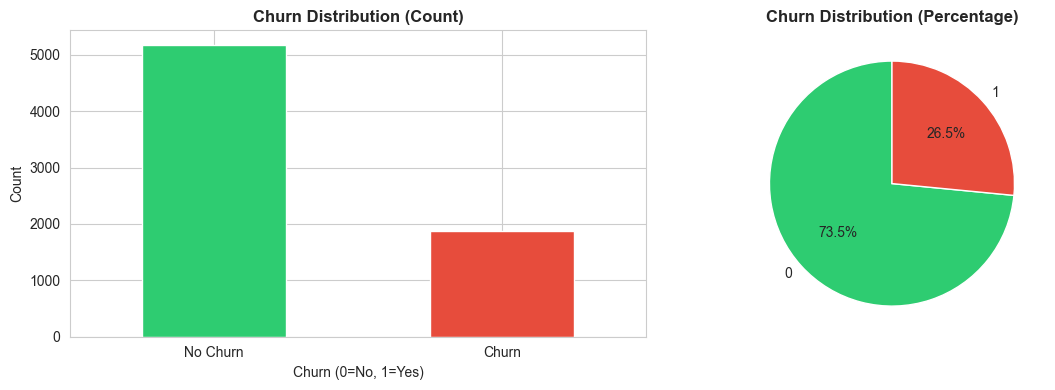

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
df.Churn.value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Distribution (Count)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Churn (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Churn', 'Churn'], rotation=0)

# Pie chart
df.Churn.value_counts(normalize=True).plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                             colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Churn Distribution (Percentage)', fontweight='bold', fontsize=12)
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


### 5. Binary Features Analysis

Binary Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


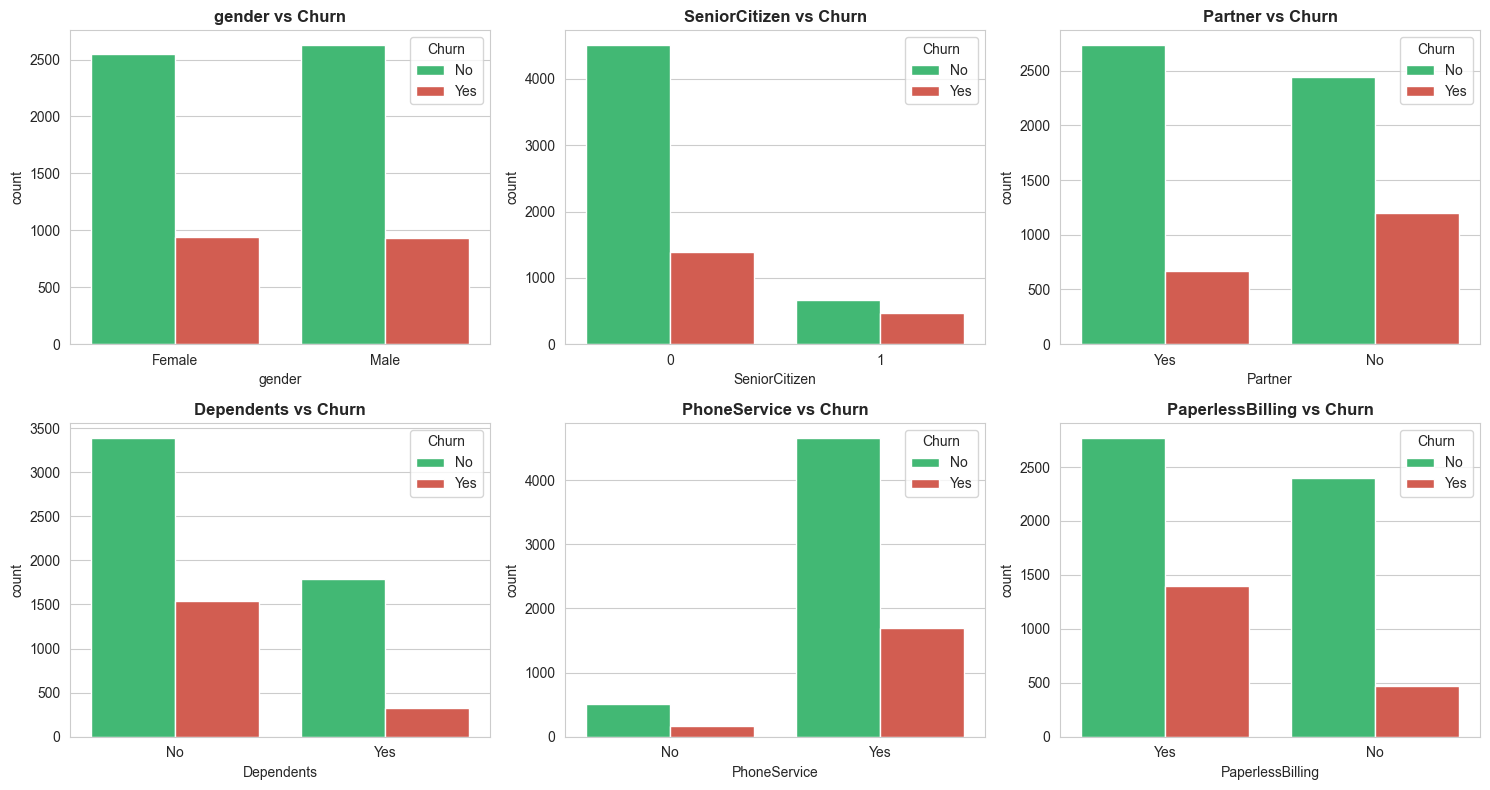

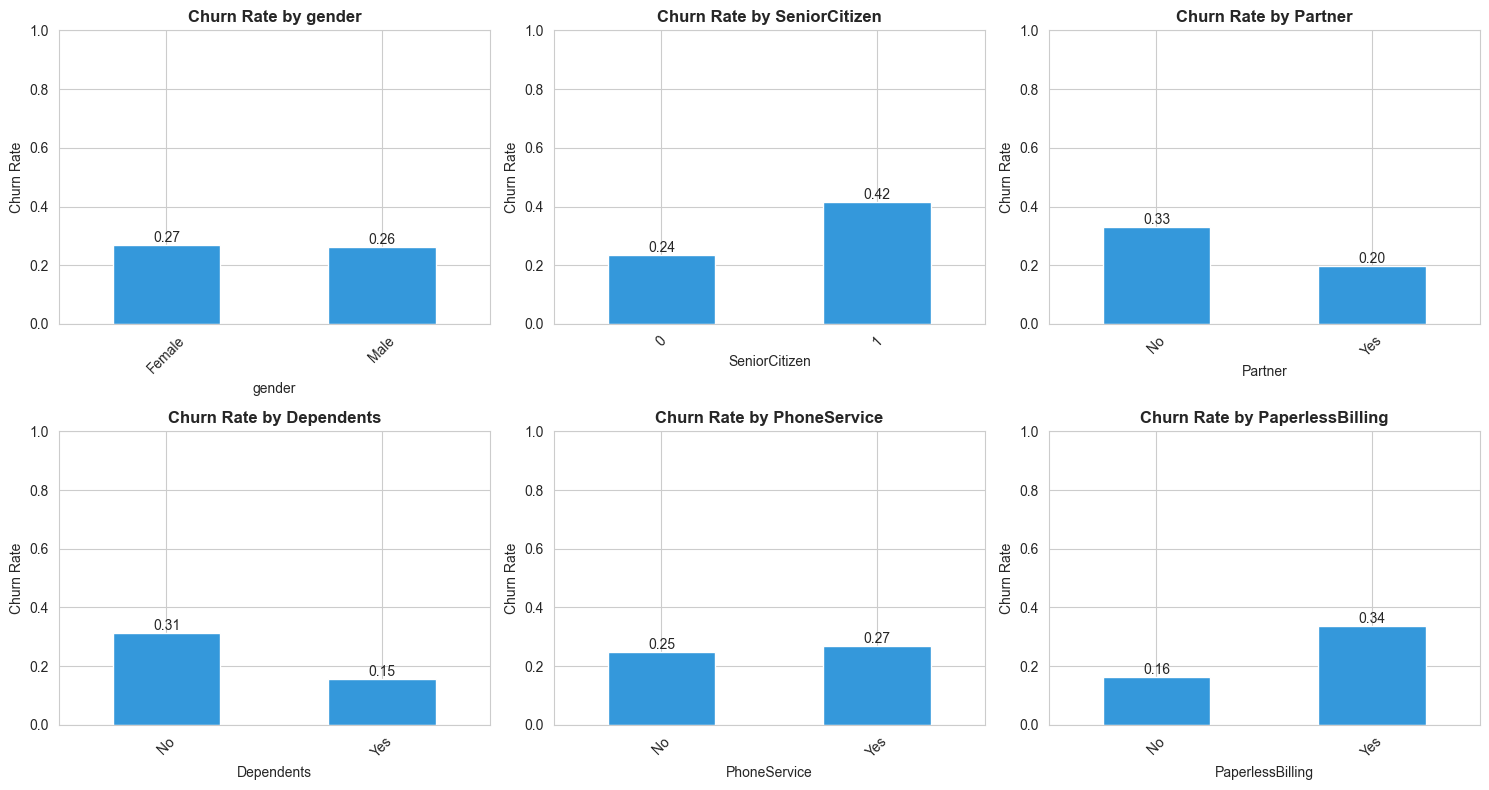

Churn Rate by Binary Features:


gender:
           Churn      
            mean count
gender                
Female  0.269209  3488
Male    0.261603  3555

SeniorCitizen:
                  Churn      
                   mean count
SeniorCitizen                
0              0.236062  5901
1              0.416813  1142

Partner:
            Churn      
             mean count
Partner                
No       0.329580  3641
Yes      0.196649  3402

Dependents:
               Churn      
                mean count
Dependents                
No          0.312791  4933
Yes         0.154502  2110

PhoneService:
                 Churn      
                  mean count
PhoneService                
No            0.249267   682
Yes           0.267096  6361

PaperlessBilling:
                     Churn      
                      mean count
PaperlessBilling                
No                0.163301  2872
Yes               0.335651  4171


In [5]:
# Identify binary columns
binary_cols = []
for col in df.columns:
    if df[col].nunique() == 2:
        binary_cols.append(col)

print("Binary Columns:", binary_cols)

#Binary Features vs Churn (Count)


fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

binary_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for idx, col in enumerate(binary_features):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[idx], palette=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'{col} vs Churn', fontweight='bold')
    axes[idx].legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.savefig('02_binary_features_vs_churn.png', dpi=300, bbox_inches='tight')
plt.show()


#Churn Rates by Binary Features


fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(binary_features):
    rate = df.groupby(col)['Churn'].mean()
    rate.plot(kind='bar', ax=axes[idx], color='#3498db')
    axes[idx].set_title(f'Churn Rate by {col}', fontweight='bold')
    axes[idx].set_ylabel('Churn Rate')
    axes[idx].set_ylim(0, 1)
    axes[idx].tick_params(axis='x', rotation=45)
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.savefig('03_churn_rates_binary.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical Summary of Binary Features

print("Churn Rate by Binary Features:\n")
for col in binary_features:
    print(f"\n{col}:")
    print(df[[col, 'Churn']].groupby([col]).agg({'Churn': ['mean', 'count']}))

### 6. Internet Service Analysis

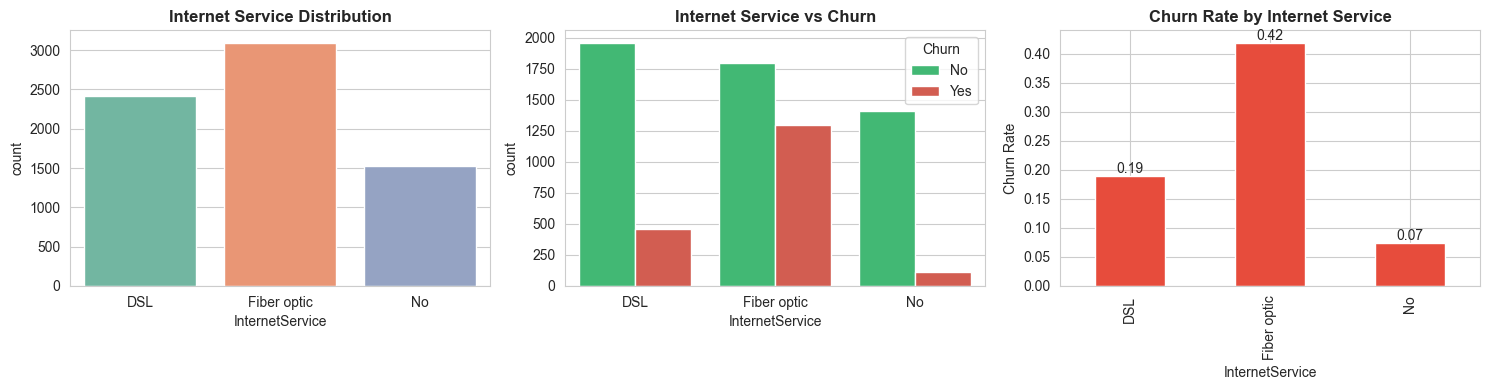


Internet Service Statistics:
                    Churn      
                     mean count
InternetService                
DSL              0.189591  2421
Fiber optic      0.418928  3096
No               0.074050  1526

Monthly Charges by Internet Service:
                 MonthlyCharges
InternetService                
DSL                   58.102169
Fiber optic           91.500129
No                    21.079194


In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Distribution
sns.countplot(x="InternetService", data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Internet Service Distribution', fontweight='bold')

# vs Churn
sns.countplot(x="InternetService", hue='Churn', data=df, ax=axes[1], palette=['#2ecc71', '#e74c3c'])
axes[1].set_title('Internet Service vs Churn', fontweight='bold')
axes[1].legend(title='Churn', labels=['No', 'Yes'])

# Churn Rate
churn_by_internet = df.groupby('InternetService')['Churn'].mean()
churn_by_internet.plot(kind='bar', ax=axes[2], color='#e74c3c')
axes[2].set_title('Churn Rate by Internet Service', fontweight='bold')
axes[2].set_ylabel('Churn Rate')
for container in axes[2].containers:
    axes[2].bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.savefig('04_internet_service_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nInternet Service Statistics:")
print(df[['InternetService', 'Churn']].groupby('InternetService').agg({'Churn': ['mean', 'count']}))
print("\nMonthly Charges by Internet Service:")
print(df[['InternetService', 'MonthlyCharges']].groupby('InternetService').mean())




### 7. Additional Services Analysis




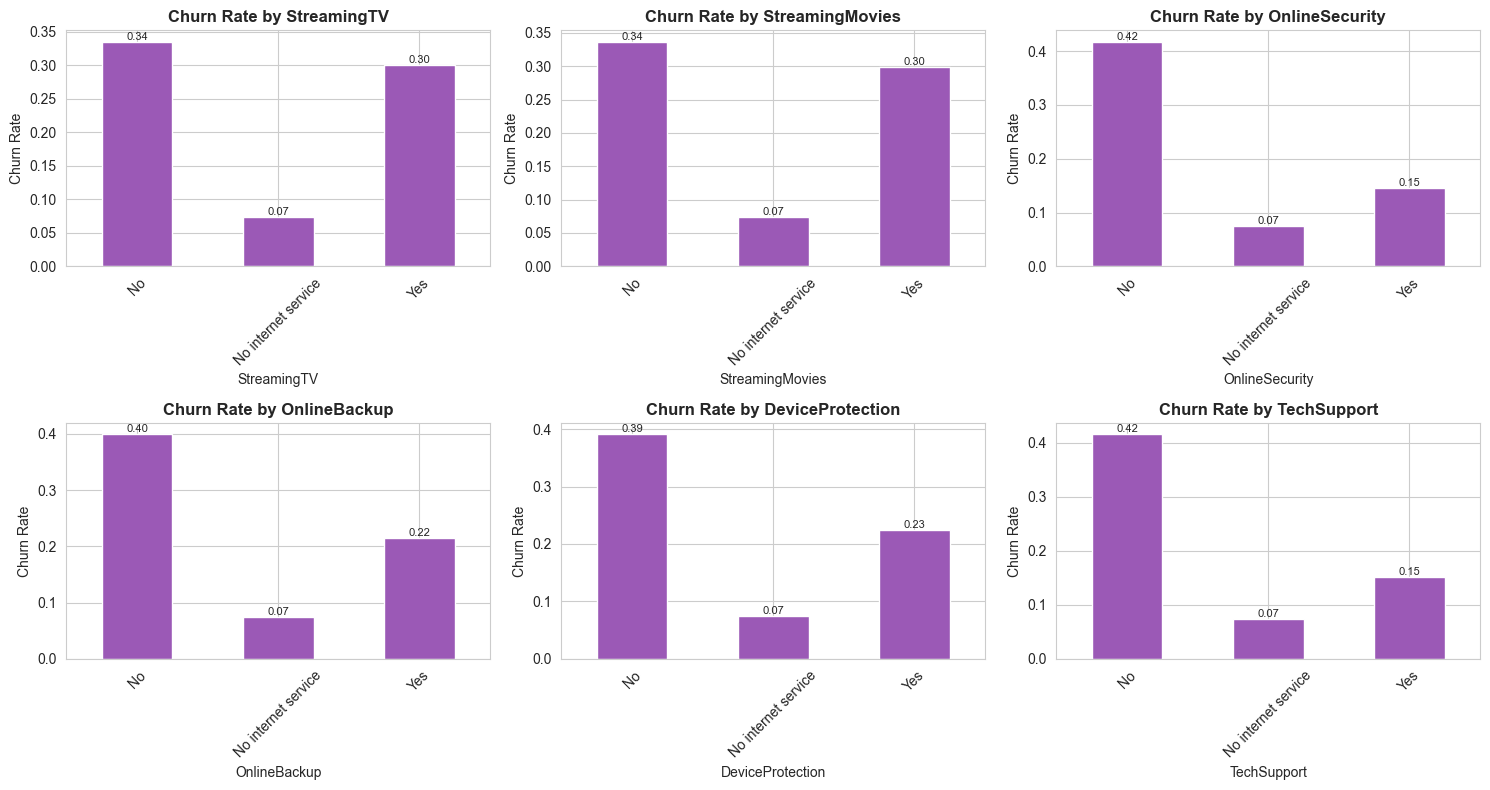

Churn Rates by Additional Services:


StreamingTV:
                        Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702

StreamingMovies:
                        Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414

OnlineSecurity:
                        Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112

OnlineBackup:
                        Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.215315

DeviceProtection:
                        Churn
DeviceProtection             
No                   0.391276
No internet service  0.074050
Yes                  0.225021

TechSupport:
                        Churn
TechSupport                  
No                   0.416355
No internet service  0.074

In [7]:
service_cols = ['StreamingTV', 'StreamingMovies', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(service_cols):
    churn_rate = df.groupby(col)['Churn'].mean()
    churn_rate.plot(kind='bar', ax=axes[idx], color='#9b59b6')
    axes[idx].set_title(f'Churn Rate by {col}', fontweight='bold')
    axes[idx].set_ylabel('Churn Rate')
    axes[idx].tick_params(axis='x', rotation=45)
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.2f', fontsize=8)

plt.tight_layout()
plt.savefig('05_services_churn_rates.png', dpi=300, bbox_inches='tight')
plt.show()


# Services Statistics

print("Churn Rates by Additional Services:\n")
for col in service_cols:
    print(f"\n{col}:")
    print(df[[col, 'Churn']].groupby(col).mean())

### 8. Contract and Payment Method Analysis

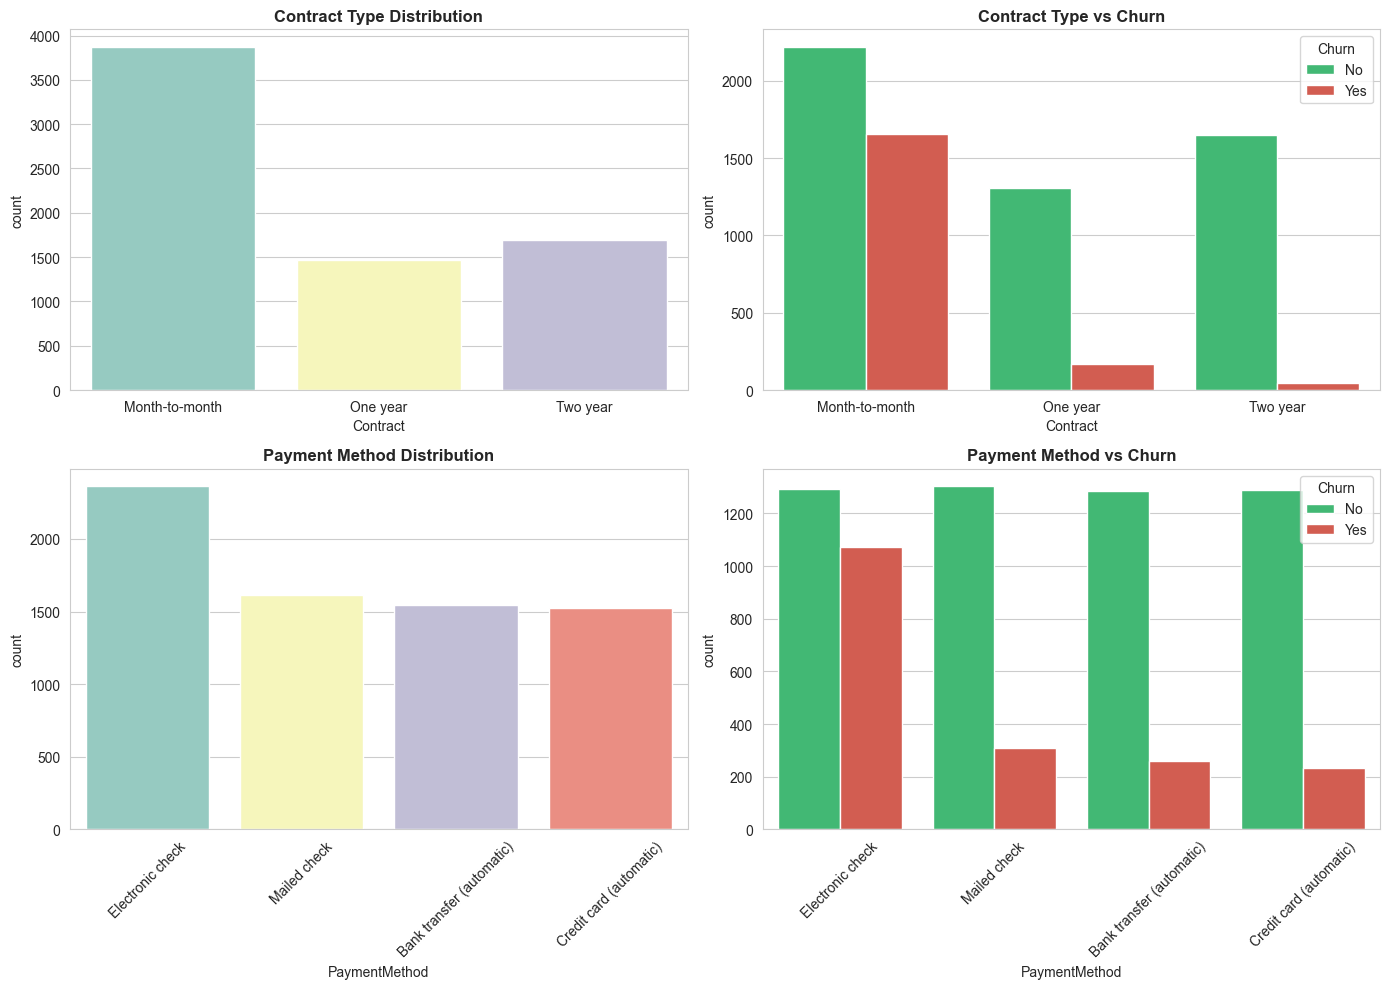


Contract Statistics:
                   Churn      
                    mean count
Contract                      
Month-to-month  0.427097  3875
One year        0.112695  1473
Two year        0.028319  1695

Payment Method Statistics:
                              Churn      
                               mean count
PaymentMethod                            
Bank transfer (automatic)  0.167098  1544
Credit card (automatic)    0.152431  1522
Electronic check           0.452854  2365
Mailed check               0.191067  1612


In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Contract Distribution
sns.countplot(x="Contract", data=df, ax=axes[0, 0], palette='Set3')
axes[0, 0].set_title('Contract Type Distribution', fontweight='bold')

# Contract vs Churn
sns.countplot(x="Contract", hue='Churn', data=df, ax=axes[0, 1], palette=['#2ecc71', '#e74c3c'])
axes[0, 1].set_title('Contract Type vs Churn', fontweight='bold')
axes[0, 1].legend(title='Churn', labels=['No', 'Yes'])

# Payment Method Distribution
sns.countplot(x="PaymentMethod", data=df, ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title('Payment Method Distribution', fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# Payment Method vs Churn
sns.countplot(x="PaymentMethod", hue='Churn', data=df, ax=axes[1, 1], palette=['#2ecc71', '#e74c3c'])
axes[1, 1].set_title('Payment Method vs Churn', fontweight='bold')
axes[1, 1].legend(title='Churn', labels=['No', 'Yes'])
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('06_contract_payment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nContract Statistics:")
print(df[['Contract', 'Churn']].groupby('Contract').agg({'Churn': ['mean', 'count']}))
print("\nPayment Method Statistics:")
print(df[['PaymentMethod', 'Churn']].groupby('PaymentMethod').agg({'Churn': ['mean', 'count']}))




### 9. Numerical Features Analysis










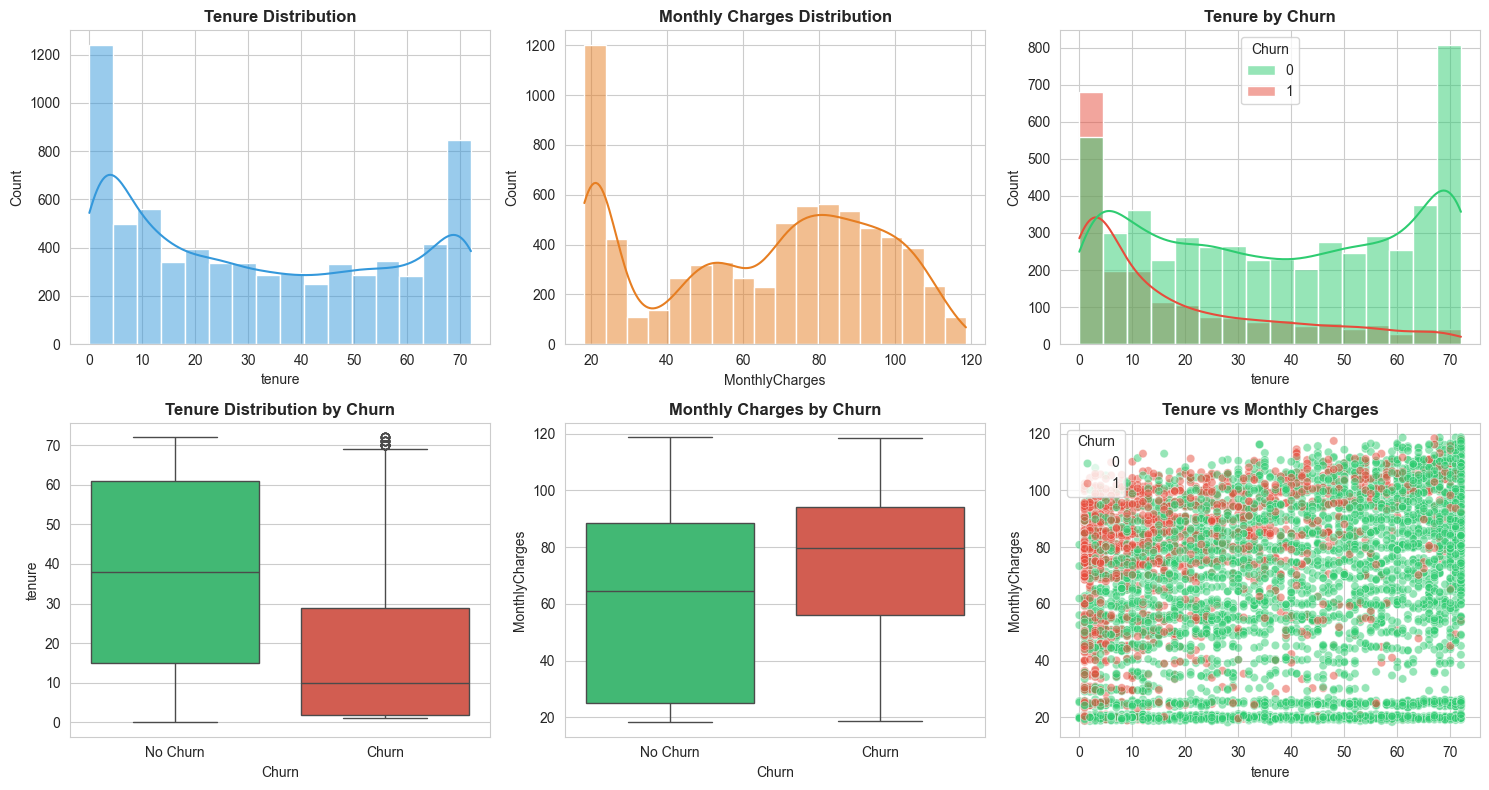


Numerical Features by Churn:
       tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
0      5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      MonthlyCharges                                                            
               count       mean        std    min    25%     50%   75%     max  
Churn                                                                           
0             5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75  
1             1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35  


In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Tenure distribution
sns.histplot(df["tenure"], kde=True, ax=axes[0, 0], color='#3498db')
axes[0, 0].set_title('Tenure Distribution', fontweight='bold')

# Monthly Charges distribution
sns.histplot(df["MonthlyCharges"], kde=True, ax=axes[0, 1], color='#e67e22')
axes[0, 1].set_title('Monthly Charges Distribution', fontweight='bold')

# Tenure by Churn
sns.histplot(data=df, x="tenure", hue="Churn", kde=True, ax=axes[0, 2], palette=['#2ecc71', '#e74c3c'])
axes[0, 2].set_title('Tenure by Churn', fontweight='bold')

# Tenure boxplot
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[1, 0], palette=['#2ecc71', '#e74c3c'])
axes[1, 0].set_title('Tenure Distribution by Churn', fontweight='bold')
axes[1, 0].set_xticklabels(['No Churn', 'Churn'])

# Monthly Charges boxplot
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1, 1], palette=['#2ecc71', '#e74c3c'])
axes[1, 1].set_title('Monthly Charges by Churn', fontweight='bold')
axes[1, 1].set_xticklabels(['No Churn', 'Churn'])

# Scatter plot
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, ax=axes[1, 2], 
                palette=['#2ecc71', '#e74c3c'], alpha=0.5)
axes[1, 2].set_title('Tenure vs Monthly Charges', fontweight='bold')

plt.tight_layout()
plt.savefig('07_numerical_features_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nNumerical Features by Churn:")
print(df[['tenure', 'MonthlyCharges', 'Churn']].groupby('Churn').describe())


### 10. Correlation Analysis

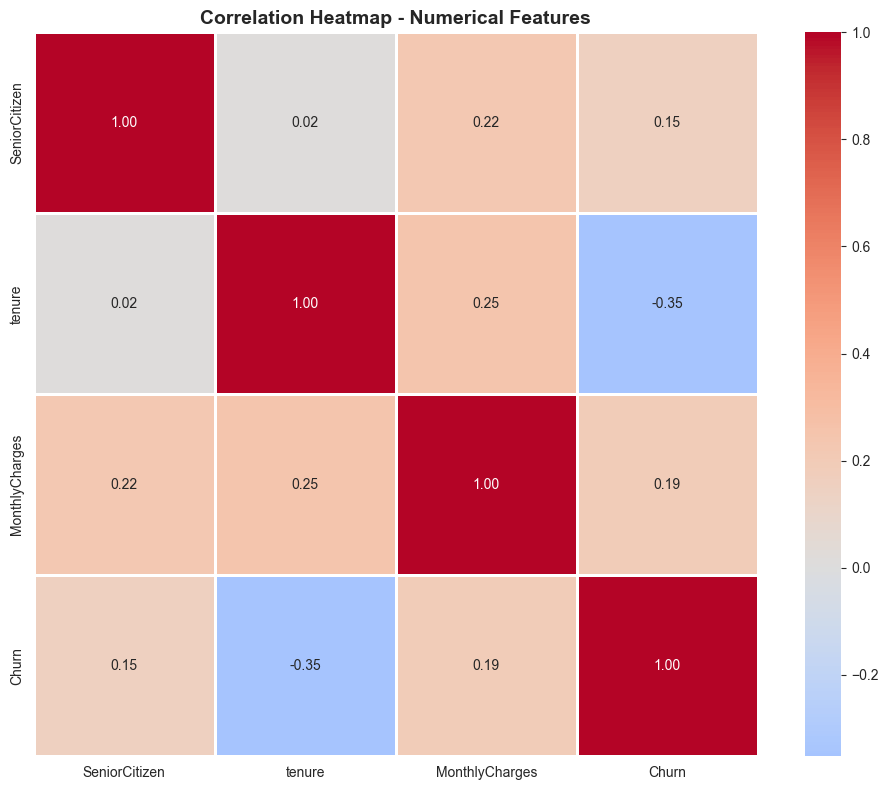

In [10]:
numerical_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Heatmap - Numerical Features', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('08_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### 11. Data Preprocessing

In [11]:



# Drop uninformative columns
print("Columns before dropping:", df.columns.tolist())
df.drop(['customerID', 'gender', 'PhoneService', 'Contract', 'TotalCharges'], axis=1, inplace=True)
print("\nColumns after dropping:", df.columns.tolist())
print("\nNew shape:", df.shape)

# One-Hot Encoding
cat_features = ['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 
                'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV',
                'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

X = pd.get_dummies(df, columns=cat_features, drop_first=True)
print("Shape after encoding:", X.shape)
print("\nEncoded columns:")
print(X.columns.tolist())


#  Feature Scaling

sc = MinMaxScaler()
X['tenure'] = sc.fit_transform(df[['tenure']])
X['MonthlyCharges'] = sc.fit_transform(df[['MonthlyCharges']])

print("✓ Features scaled successfully!")
print("\nFirst few rows after preprocessing:")
display(X.head())


Columns before dropping: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Columns after dropping: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn']

New shape: (7043, 16)
Shape after encoding: (7043, 26)

Encoded columns:
['tenure', 'MonthlyCharges', 'Churn', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'O

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,False,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0.472222,0.385075,0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,0.027778,0.354229,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0.625000,0.239303,0,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,0.027778,0.521891,1,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


### 12. Handle Class Imbalance (Upsampling)

Class distribution before resampling:
Churn
0    5174
1    1869
Name: count, dtype: int64


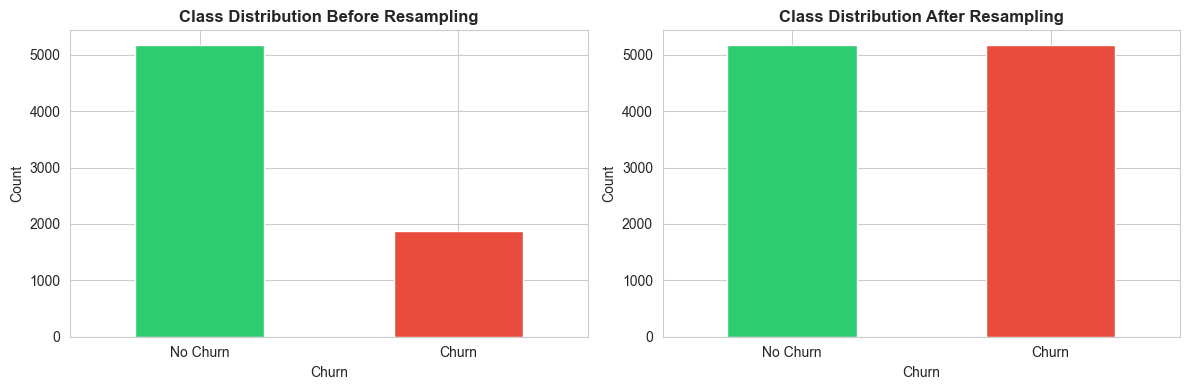


Class distribution after resampling:
Churn
0    5174
1    5174
Name: count, dtype: int64


In [12]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Before resampling
X['Churn'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Class Distribution Before Resampling', fontweight='bold')
axes[0].set_xticklabels(['No Churn', 'Churn'], rotation=0)
axes[0].set_ylabel('Count')

print("Class distribution before resampling:")
print(X['Churn'].value_counts())

# Perform upsampling
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
X_upsampled = pd.concat([X_no, X_yes_upsampled], axis=0).reset_index(drop=True)

# After resampling
X_upsampled['Churn'].value_counts().plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Class Distribution After Resampling', fontweight='bold')
axes[1].set_xticklabels(['No Churn', 'Churn'], rotation=0)
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('09_resampling_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nClass distribution after resampling:")
print(X_upsampled['Churn'].value_counts())

### 13. Train-Test Split

In [13]:
X = X_upsampled.drop(['Churn'], axis=1)
y = X_upsampled['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"\nTest set class distribution:")
print(y_test.value_counts())

Training set size: 8278
Test set size: 2070
Number of features: 25

Training set class distribution:
Churn
1    4148
0    4130
Name: count, dtype: int64

Test set class distribution:
Churn
0    1044
1    1026
Name: count, dtype: int64


### 14. Model Training with Grid Search CV

In [14]:
# Initialize Storage for Results

results = {}
trained_models = {}

print("✓ Storage initialized for results and trained models")

# Logistic Regression
print("="*80)
print("Training Logistic Regression...")
print("="*80)

log_parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

log_model = LogisticRegression(random_state=42, class_weight='balanced')
log_clf = GridSearchCV(estimator=log_model, param_grid=log_parameters, n_jobs=-1, cv=5, scoring='f1')
log_clf.fit(X, y)

y_pred_log = log_clf.predict(X_test)
y_pred_proba_log = log_clf.predict_proba(X_test)[:, 1]
cm_log = confusion_matrix(y_test, y_pred_log)

results['Logistic Regression'] = {
    'best_params': log_clf.best_params_,
    'best_score': log_clf.best_score_,
    'accuracy': accuracy_score(y_test, y_pred_log),
    'precision': precision_score(y_test, y_pred_log),
    'recall': recall_score(y_test, y_pred_log),
    'confusion_matrix': cm_log,
    'predictions': y_pred_log,
    'pred_proba': y_pred_proba_log
}

trained_models['Logistic Regression'] = log_clf.best_estimator_

print("✓ Logistic Regression Training Complete!")
print(f"Best Parameters: {log_clf.best_params_}")
print(f"Best CV Score: {log_clf.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_log):.4f}")
print(f"Test Recall: {recall_score(y_test, y_pred_log):.4f}")


# Random Forest

print("="*80)
print("Training Random Forest...")
print("="*80)

rf_parameters = {'n_estimators': [100, 150], 'max_depth': [10, 15]}

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_clf = GridSearchCV(estimator=rf_model, param_grid=rf_parameters, n_jobs=-1, cv=5, scoring='f1')
rf_clf.fit(X, y)

y_pred_rf = rf_clf.predict(X_test)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
cm_rf = confusion_matrix(y_test, y_pred_rf)

results['Random Forest'] = {
    'best_params': rf_clf.best_params_,
    'best_score': rf_clf.best_score_,
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'confusion_matrix': cm_rf,
    'predictions': y_pred_rf,
    'pred_proba': y_pred_proba_rf
}

trained_models['Random Forest'] = rf_clf.best_estimator_

print("✓ Random Forest Training Complete!")
print(f"Best Parameters: {rf_clf.best_params_}")
print(f"Best CV Score: {rf_clf.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Test Recall: {recall_score(y_test, y_pred_rf):.4f}")


# XGBoost

print("="*80)
print("Training XGBoost...")
print("="*80)

xgb_parameters = {'n_estimators': [100, 150, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf = GridSearchCV(estimator=xgb_model, param_grid=xgb_parameters, n_jobs=-1, cv=5, scoring='f1')
xgb_clf.fit(X, y)

y_pred_xgb = xgb_clf.predict(X_test)
y_pred_proba_xgb = xgb_clf.predict_proba(X_test)[:, 1]
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

results['XGBoost'] = {
    'best_params': xgb_clf.best_params_,
    'best_score': xgb_clf.best_score_,
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb),
    'recall': recall_score(y_test, y_pred_xgb),
    'confusion_matrix': cm_xgb,
    'predictions': y_pred_xgb,
    'pred_proba': y_pred_proba_xgb
}

trained_models['XGBoost'] = xgb_clf.best_estimator_

print("✓ XGBoost Training Complete!")
print(f"Best Parameters: {xgb_clf.best_params_}")
print(f"Best CV Score: {xgb_clf.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Test Recall: {recall_score(y_test, y_pred_xgb):.4f}")


# Support Vector Machine (SVM)

print("="*80)
print("Training SVM...")
print("="*80)

svm_parameters = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto']}

svm_model = SVC(random_state=42, class_weight='balanced', probability=True)
svm_clf = GridSearchCV(estimator=svm_model, param_grid=svm_parameters, n_jobs=-1, cv=5, scoring='f1')
svm_clf.fit(X, y)

y_pred_svm = svm_clf.predict(X_test)
y_pred_proba_svm = svm_clf.predict_proba(X_test)[:, 1]
cm_svm = confusion_matrix(y_test, y_pred_svm)

results['SVM'] = {
    'best_params': svm_clf.best_params_,
    'best_score': svm_clf.best_score_,
    'accuracy': accuracy_score(y_test, y_pred_svm),
    'precision': precision_score(y_test, y_pred_svm),
    'recall': recall_score(y_test, y_pred_svm),
    'confusion_matrix': cm_svm,
    'predictions': y_pred_svm,
    'pred_proba': y_pred_proba_svm
}

trained_models['SVM'] = svm_clf.best_estimator_

print("✓ SVM Training Complete!")
print(f"Best Parameters: {svm_clf.best_params_}")
print(f"Best CV Score: {svm_clf.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Test Recall: {recall_score(y_test, y_pred_svm):.4f}")


# Gradient Boosting

print("="*80)
print("Training Gradient Boosting...")
print("="*80)

gbm_parameters = {'n_estimators': [100, 150, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}

gbm_model = GradientBoostingClassifier(random_state=42)
gbm_clf = GridSearchCV(estimator=gbm_model, param_grid=gbm_parameters, n_jobs=-1, cv=5, scoring='f1')
gbm_clf.fit(X, y)

y_pred_gbm = gbm_clf.predict(X_test)
y_pred_proba_gbm = gbm_clf.predict_proba(X_test)[:, 1]
cm_gbm = confusion_matrix(y_test, y_pred_gbm)

results['Gradient Boosting'] = {
    'best_params': gbm_clf.best_params_,
    'best_score': gbm_clf.best_score_,
    'accuracy': accuracy_score(y_test, y_pred_gbm),
    'precision': precision_score(y_test, y_pred_gbm),
    'recall': recall_score(y_test, y_pred_gbm),
    'confusion_matrix': cm_gbm,
    'predictions': y_pred_gbm,
    'pred_proba': y_pred_proba_gbm
}

trained_models['Gradient Boosting'] = gbm_clf.best_estimator_

print("✓ Gradient Boosting Training Complete!")
print(f"Best Parameters: {gbm_clf.best_params_}")
print(f"Best CV Score: {gbm_clf.best_score_:.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_gbm):.4f}")
print(f"Test Recall: {recall_score(y_test, y_pred_gbm):.4f}")

✓ Storage initialized for results and trained models
Training Logistic Regression...
✓ Logistic Regression Training Complete!
Best Parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Best CV Score: 0.7594
Test Accuracy: 0.7628
Test Recall: 0.7700
Training Random Forest...
✓ Random Forest Training Complete!
Best Parameters: {'max_depth': 15, 'n_estimators': 150}
Best CV Score: 0.8989
Test Accuracy: 0.9744
Test Recall: 0.9990
Training XGBoost...
✓ XGBoost Training Complete!
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best CV Score: 0.8832
Test Accuracy: 0.9691
Test Recall: 0.9951
Training SVM...
✓ SVM Training Complete!
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.8101
Test Accuracy: 0.8478
Test Recall: 0.8947
Training Gradient Boosting...
✓ Gradient Boosting Training Complete!
Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best CV Score: 0.9002
Test Accuracy: 0.9952
T

### 15. Save Trained Models

In [15]:
print("="*80)
print("SAVING TRAINED MODELS")
print("="*80)

for model_name, model in trained_models.items():
    filename = f"model_{model_name.replace(' ', '_').lower()}.pkl"
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"✓ Saved: {filename}")

# Save the scaler as well
with open('scaler.pkl', 'wb') as file:
    pickle.dump(sc, file)
print("✓ Saved: scaler.pkl")

print("\n✓ All models saved successfully!")

SAVING TRAINED MODELS
✓ Saved: model_logistic_regression.pkl
✓ Saved: model_random_forest.pkl
✓ Saved: model_xgboost.pkl
✓ Saved: model_svm.pkl
✓ Saved: model_gradient_boosting.pkl
✓ Saved: scaler.pkl

✓ All models saved successfully!


### 16. Model Evaluation Visualizations

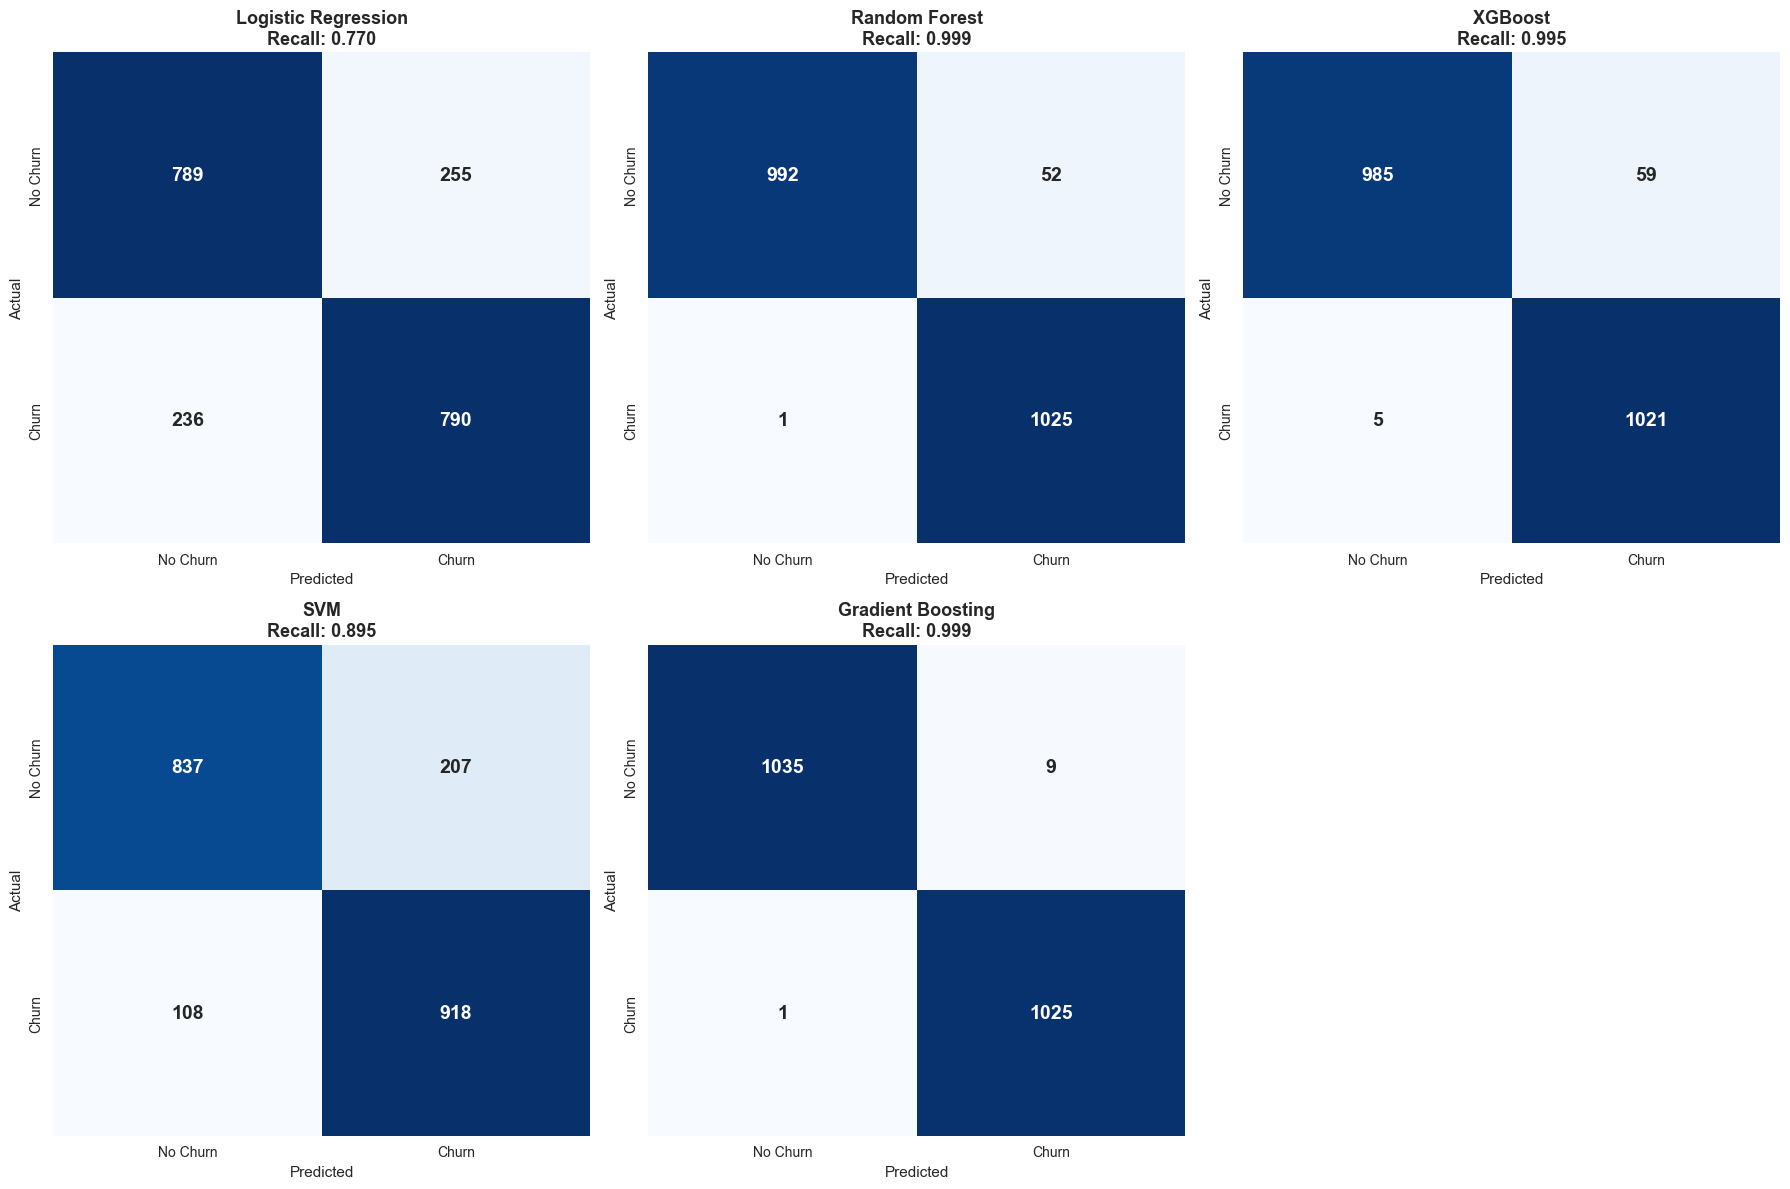

Model Comparison Summary:


,Model,Best CV Score,Accuracy,Precision,Recall,Best Parameters
1,Random Forest,0.898906,0.974396,0.951718,0.999025,"{'max_depth': 15, 'n_estimators': 150}"
4,Gradient Boosting,0.900206,0.995169,0.991296,0.999025,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti..."
2,XGBoost,0.883225,0.969082,0.945370,0.995127,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti..."
3,SVM,0.810104,0.847826,0.816000,0.894737,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
0,Logistic Regression,0.759409,0.762802,0.755981,0.769981,"{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', ..."


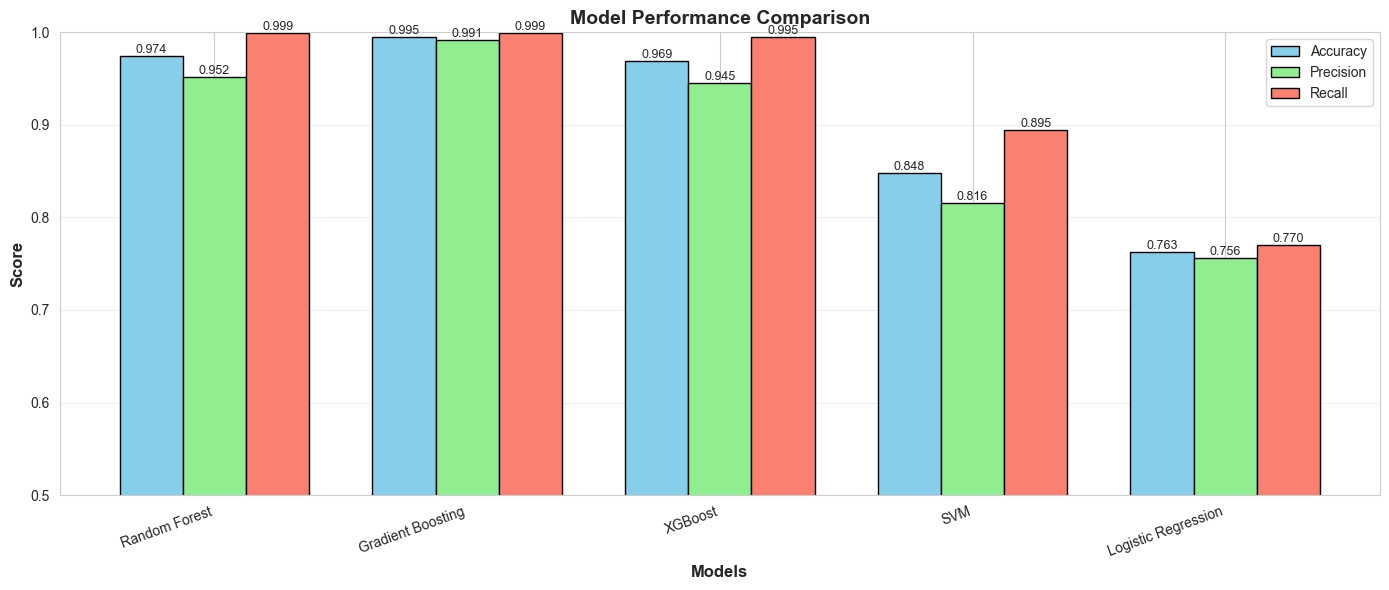

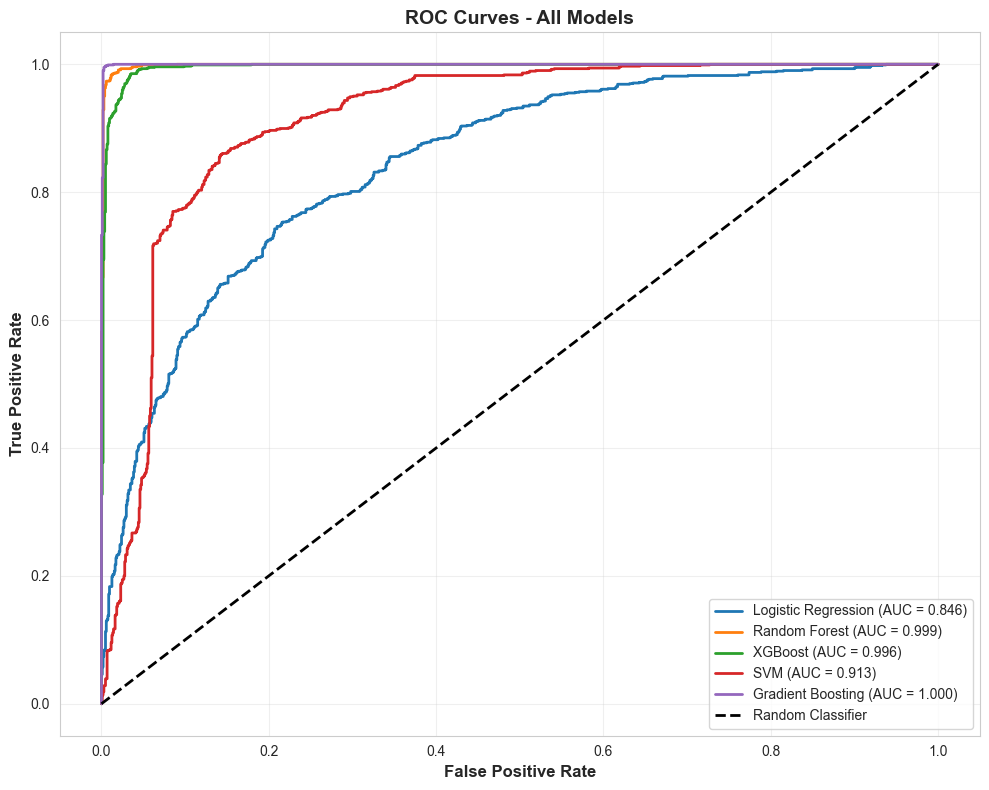

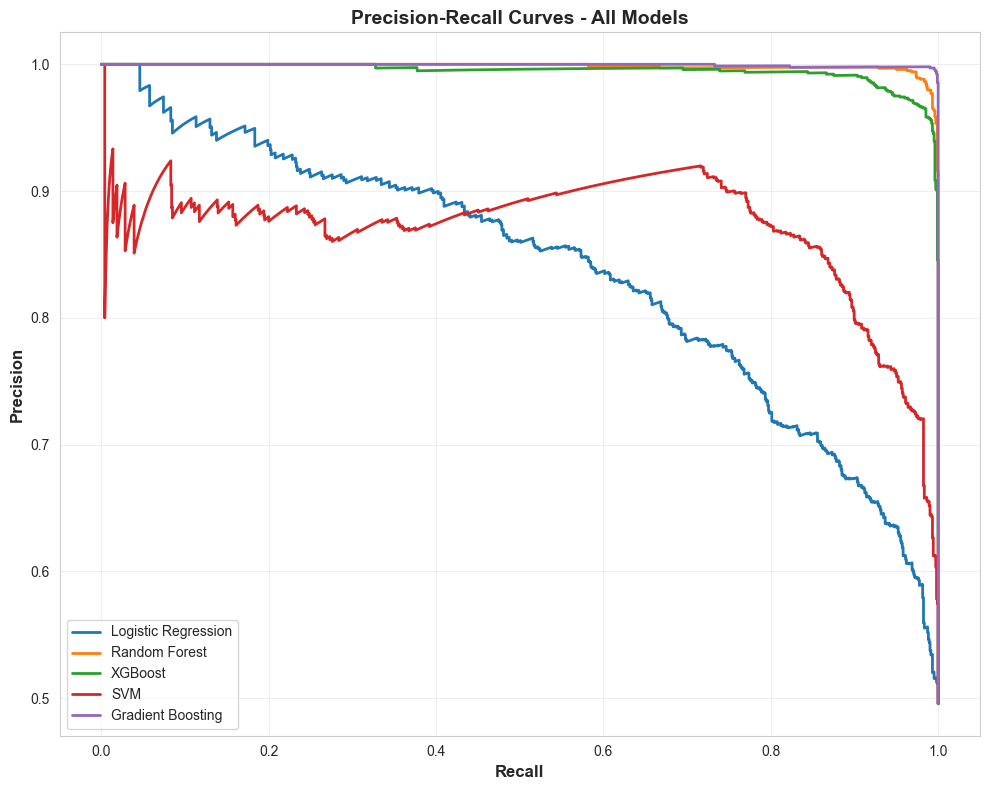

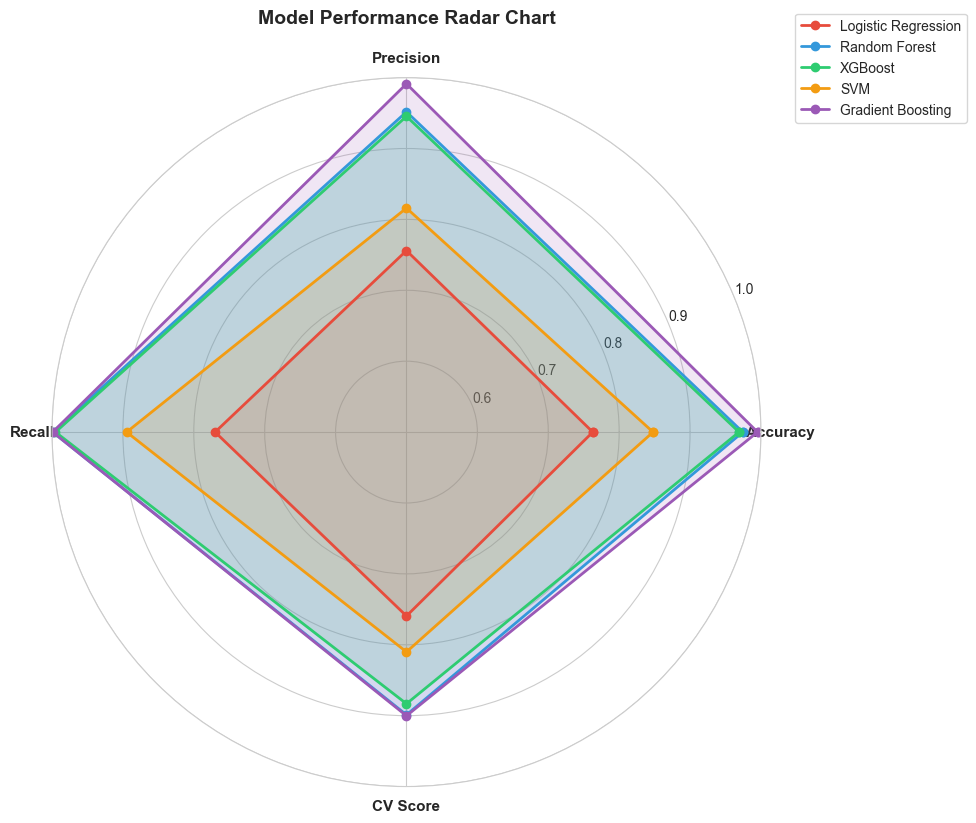

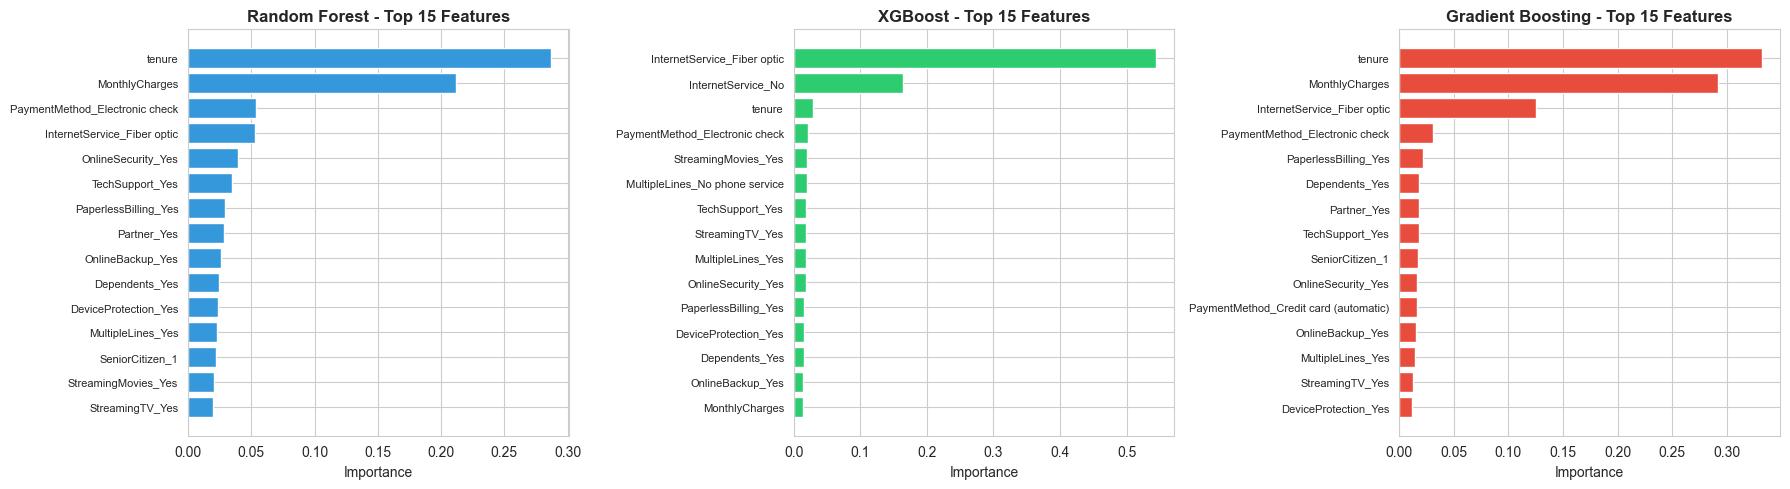

In [16]:

# Confusion Matrices for All Models


fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()
model_names = list(results.keys())

for idx, model_name in enumerate(model_names):
    cm = results[model_name]['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'],
                cbar=False, annot_kws={'size': 14, 'weight': 'bold'})
    axes[idx].set_title(f'{model_name}\nRecall: {results[model_name]["recall"]:.3f}', 
                        fontsize=13, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=11)
    axes[idx].set_xlabel('Predicted', fontsize=11)

axes[5].axis('off')
plt.tight_layout()
plt.savefig('10_all_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()


# Metrics Comparison

summary_data = []
for model_name, metrics in results.items():
    summary_data.append({
        'Model': model_name,
        'Best CV Score': metrics['best_score'],
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'Best Parameters': str(metrics['best_params'])
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Recall', ascending=False)

print("Model Comparison Summary:")
display(summary_df)

# Bar chart comparison
fig, ax = plt.subplots(figsize=(14, 6))
x = range(len(summary_df))
width = 0.25

bars1 = ax.bar([i - width for i in x], summary_df['Accuracy'], width, 
               label='Accuracy', color='skyblue', edgecolor='black')
bars2 = ax.bar(x, summary_df['Precision'], width, 
               label='Precision', color='lightgreen', edgecolor='black')
bars3 = ax.bar([i + width for i in x], summary_df['Recall'], width, 
               label='Recall', color='salmon', edgecolor='black')

ax.set_xlabel('Models', fontweight='bold', fontsize=12)
ax.set_ylabel('Score', fontweight='bold', fontsize=12)
ax.set_title('Model Performance Comparison', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(summary_df['Model'], rotation=20, ha='right')
ax.legend()
ax.set_ylim(0.5, 1.0)
ax.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.3f}', 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('11_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


# ROC Curves

plt.figure(figsize=(10, 8))

for model_name in model_names:
    y_pred_proba = results[model_name]['pred_proba']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('12_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()


# Precision-Recall Curves


plt.figure(figsize=(10, 8))

for model_name in model_names:
    y_pred_proba = results[model_name]['pred_proba']
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f'{model_name}', linewidth=2)

plt.xlabel('Recall', fontsize=12, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('Precision-Recall Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('13_precision_recall_curves.png', dpi=300, bbox_inches='tight')
plt.show()


# Performance Radar Chart


categories = ['Accuracy', 'Precision', 'Recall', 'CV Score']
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for idx, model_name in enumerate(model_names):
    values = [
        results[model_name]['accuracy'],
        results[model_name]['precision'],
        results[model_name]['recall'],
        results[model_name]['best_score']
    ]
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=model_name, color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=11, fontweight='bold')
ax.set_ylim(0.5, 1.0)
ax.set_yticks([0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticklabels(['0.6', '0.7', '0.8', '0.9', '1.0'])
ax.set_title('Model Performance Radar Chart', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.grid(True)

plt.tight_layout()
plt.savefig('14_performance_radar.png', dpi=300, bbox_inches='tight')
plt.show()


# Feature Importance (Tree-based Models)


fig, axes = plt.subplots(1, 3, figsize=(18, 5))
feature_names = X.columns

# Random Forest
rf_importance = trained_models['Random Forest'].feature_importances_
rf_indices = np.argsort(rf_importance)[-15:]
axes[0].barh(range(len(rf_indices)), rf_importance[rf_indices], color='#3498db')
axes[0].set_yticks(range(len(rf_indices)))
axes[0].set_yticklabels([feature_names[i] for i in rf_indices], fontsize=8)
axes[0].set_xlabel('Importance')
axes[0].set_title('Random Forest - Top 15 Features', fontweight='bold')

# XGBoost
xgb_importance = trained_models['XGBoost'].feature_importances_
xgb_indices = np.argsort(xgb_importance)[-15:]
axes[1].barh(range(len(xgb_indices)), xgb_importance[xgb_indices], color='#2ecc71')
axes[1].set_yticks(range(len(xgb_indices)))
axes[1].set_yticklabels([feature_names[i] for i in xgb_indices], fontsize=8)
axes[1].set_xlabel('Importance')
axes[1].set_title('XGBoost - Top 15 Features', fontweight='bold')

# Gradient Boosting
gbm_importance = trained_models['Gradient Boosting'].feature_importances_
gbm_indices = np.argsort(gbm_importance)[-15:]
axes[2].barh(range(len(gbm_indices)), gbm_importance[gbm_indices], color='#e74c3c')
axes[2].set_yticks(range(len(gbm_indices)))
axes[2].set_yticklabels([feature_names[i] for i in gbm_indices], fontsize=8)
axes[2].set_xlabel('Importance')
axes[2].set_title('Gradient Boosting - Top 15 Features', fontweight='bold')

plt.tight_layout()
plt.savefig('15_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

 ### 17. Final Summary and Best Model

In [17]:
print("="*80)
print("FINAL RESULTS SUMMARY")
print("="*80)
display(summary_df)

best_model = summary_df.iloc[0]['Model']
print(f"\n{'='*80}")
print(f"BEST MODEL BY RECALL: {best_model}")
print(f"{'='*80}")
print(f"Recall: {summary_df.iloc[0]['Recall']:.4f}")
print(f"Precision: {summary_df.iloc[0]['Precision']:.4f}")
print(f"Accuracy: {summary_df.iloc[0]['Accuracy']:.4f}")
print(f"Best Parameters: {summary_df.iloc[0]['Best Parameters']}")


# Detailed Classification Report for Best Model

print(f"\nDetailed Classification Report for {best_model}:")
print("="*80)
y_pred_best = results[best_model]['predictions']
print(classification_report(y_test, y_pred_best, target_names=['No Churn', 'Churn']))


# Detailed Performance for All Models


print("\nDetailed Performance Breakdown:")
print("="*80)
for model_name in model_names:
    print(f"\n{model_name}:")
    print(f"  Best Parameters: {results[model_name]['best_params']}")
    print(f"  CV Score: {results[model_name]['best_score']:.4f}")
    print(f"  Test Accuracy: {results[model_name]['accuracy']:.4f}")
    print(f"  Test Precision: {results[model_name]['precision']:.4f}")
    print(f"  Test Recall: {results[model_name]['recall']:.4f}")
    print(f"  AUC Score: {roc_auc_score(y_test, results[model_name]['pred_proba']):.4f}")

FINAL RESULTS SUMMARY


,Model,Best CV Score,Accuracy,Precision,Recall,Best Parameters
1,Random Forest,0.898906,0.974396,0.951718,0.999025,"{'max_depth': 15, 'n_estimators': 150}"
4,Gradient Boosting,0.900206,0.995169,0.991296,0.999025,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti..."
2,XGBoost,0.883225,0.969082,0.945370,0.995127,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti..."
3,SVM,0.810104,0.847826,0.816000,0.894737,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
0,Logistic Regression,0.759409,0.762802,0.755981,0.769981,"{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', ..."



BEST MODEL BY RECALL: Random Forest
Recall: 0.9990
Precision: 0.9517
Accuracy: 0.9744
Best Parameters: {'max_depth': 15, 'n_estimators': 150}

Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

    No Churn       1.00      0.95      0.97      1044
       Churn       0.95      1.00      0.97      1026

    accuracy                           0.97      2070
   macro avg       0.98      0.97      0.97      2070
weighted avg       0.98      0.97      0.97      2070


Detailed Performance Breakdown:

Logistic Regression:
  Best Parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
  CV Score: 0.7594
  Test Accuracy: 0.7628
  Test Precision: 0.7560
  Test Recall: 0.7700
  AUC Score: 0.8456

Random Forest:
  Best Parameters: {'max_depth': 15, 'n_estimators': 150}
  CV Score: 0.8989
  Test Accuracy: 0.9744
  Test Precision: 0.9517
  Test Recall: 0.9990
  AUC Score: 0.9986

XGBoost:
  Best Parameters: {'learning_rate': 

### 18. Save Summary Report

In [18]:
# Save summary to CSV
summary_df.to_csv('model_comparison_summary.csv', index=False)
print("✓ Model comparison summary saved to: model_comparison_summary.csv")

# Create a detailed report
with open('analysis_report.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("TELCO CUSTOMER CHURN ANALYSIS - FINAL REPORT\n")
    f.write("="*80 + "\n\n")
    
    f.write("DATASET INFORMATION:\n")
    f.write(f"Total samples: {len(df) + len(X_upsampled) - len(df)}\n")
    f.write(f"Features after preprocessing: {X.shape[1]}\n")
    f.write(f"Training samples: {X_train.shape[0]}\n")
    f.write(f"Test samples: {X_test.shape[0]}\n\n")
    
    f.write("="*80 + "\n")
    f.write("MODEL COMPARISON SUMMARY:\n")
    f.write("="*80 + "\n")
    f.write(summary_df.to_string(index=False))
    f.write("\n\n")
    
    f.write("="*80 + "\n")
    f.write(f"BEST MODEL: {best_model}\n")
    f.write("="*80 + "\n")
    f.write(f"Recall: {summary_df.iloc[0]['Recall']:.4f}\n")
    f.write(f"Precision: {summary_df.iloc[0]['Precision']:.4f}\n")
    f.write(f"Accuracy: {summary_df.iloc[0]['Accuracy']:.4f}\n")
    f.write(f"Best Parameters: {summary_df.iloc[0]['Best Parameters']}\n\n")
    
    f.write("="*80 + "\n")
    f.write("DETAILED PERFORMANCE:\n")
    f.write("="*80 + "\n")
    for model_name in model_names:
        f.write(f"\n{model_name}:\n")
        f.write(f"  Best Parameters: {results[model_name]['best_params']}\n")
        f.write(f"  CV Score: {results[model_name]['best_score']:.4f}\n")
        f.write(f"  Test Accuracy: {results[model_name]['accuracy']:.4f}\n")
        f.write(f"  Test Precision: {results[model_name]['precision']:.4f}\n")
        f.write(f"  Test Recall: {results[model_name]['recall']:.4f}\n")
        f.write(f"  AUC Score: {roc_auc_score(y_test, results[model_name]['pred_proba']):.4f}\n")

print("✓ Detailed analysis report saved to: analysis_report.txt")

✓ Model comparison summary saved to: model_comparison_summary.csv
✓ Detailed analysis report saved to: analysis_report.txt


### 19. Summary of Generated Files


In [19]:
print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)

print("\n📊 Generated Visualizations:")
visualizations = [
    "01_target_distribution.png",
    "02_binary_features_vs_churn.png",
    "03_churn_rates_binary.png",
    "04_internet_service_analysis.png",
    "05_services_churn_rates.png",
    "06_contract_payment_analysis.png",
    "07_numerical_features_analysis.png",
    "08_correlation_heatmap.png",
    "09_resampling_comparison.png",
    "10_all_confusion_matrices.png",
    "11_metrics_comparison.png",
    "12_roc_curves.png",
    "13_precision_recall_curves.png",
    "14_performance_radar.png",
    "15_feature_importance.png"
]
for viz in visualizations:
    print(f"  ✓ {viz}")

print("\n🤖 Saved Models:")
for model_name in trained_models.keys():
    print(f"  ✓ model_{model_name.replace(' ', '_').lower()}.pkl")
print("  ✓ scaler.pkl")

print("\n📄 Reports:")
print("  ✓ model_comparison_summary.csv")
print("  ✓ analysis_report.txt")

print("\n" + "="*80)


✅ ANALYSIS COMPLETE!

📊 Generated Visualizations:
  ✓ 01_target_distribution.png
  ✓ 02_binary_features_vs_churn.png
  ✓ 03_churn_rates_binary.png
  ✓ 04_internet_service_analysis.png
  ✓ 05_services_churn_rates.png
  ✓ 06_contract_payment_analysis.png
  ✓ 07_numerical_features_analysis.png
  ✓ 08_correlation_heatmap.png
  ✓ 09_resampling_comparison.png
  ✓ 10_all_confusion_matrices.png
  ✓ 11_metrics_comparison.png
  ✓ 12_roc_curves.png
  ✓ 13_precision_recall_curves.png
  ✓ 14_performance_radar.png
  ✓ 15_feature_importance.png

🤖 Saved Models:
  ✓ model_logistic_regression.pkl
  ✓ model_random_forest.pkl
  ✓ model_xgboost.pkl
  ✓ model_svm.pkl
  ✓ model_gradient_boosting.pkl
  ✓ scaler.pkl

📄 Reports:
  ✓ model_comparison_summary.csv
  ✓ analysis_report.txt

